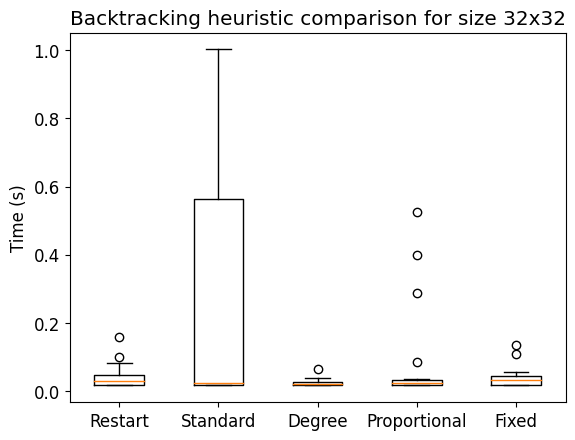

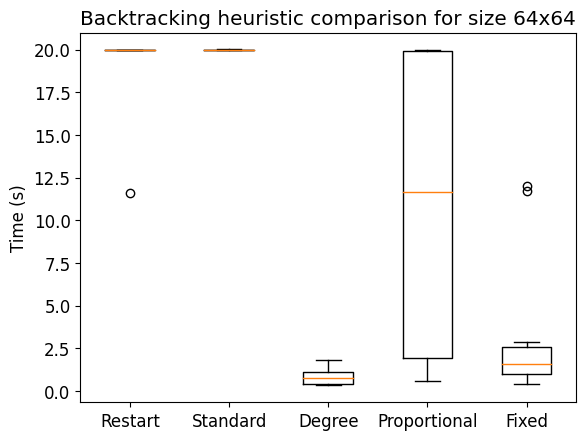

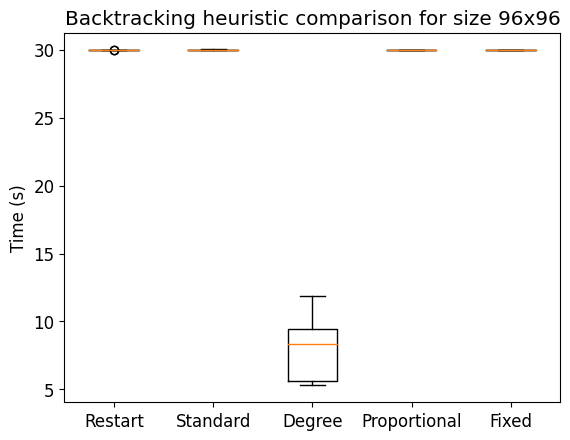

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

max_time = {}
data = np.genfromtxt("data/backtracking.csv", delimiter=",", dtype=str)
times = {}
for i in range(1, len(data)):
    size = data[i][1]
    heuristic = data[i][2]
    time = float(data[i][3])
    label = ""

    if size not in times:
        times[size] = {}
        max_time[size] = 0

    if np.isnan(time):
        label = "Didn't finish"
    else:
        max_time[size] = np.maximum(max_time[size], time)

    if heuristic not in times[size]:
        times[size][heuristic] = [[], label]

    times[size][heuristic][0].append(time)

# for size in times.keys():
#     for heuristic in times[size].keys():
#         if np.isnan(times[size][heuristic][0]):
#             times[size][heuristic][0] = max_time[size] * 1.3

sizes = times.keys()
for size in sizes:
    # x = np.arange(len(bar[size].keys()))
    # y = [bar[key][0] for key in bar.keys()]
    # labels = [bar[key][2] for key in bar.keys()]
    y = [times[size][heuristic][0] for heuristic in times[size].keys()]
    labels = [times[size][heuristic][1] for heuristic in times[size].keys()]

    plt.rc('font', size=12)

    fig, ax = plt.subplots()
    # ax.set_ylim(0, max_time[size] * 1.3)
    ax.boxplot(y)
    ax.set_xticklabels(times[size].keys())
    # b = ax.bar(x, y, capsize=10, align='center', alpha=0.5)
    # ax.bar_label(b, labels=labels, label_type='center', rotation='vertical')
    # ax.set_xticks(x, bar[size].keys())
    ax.set_ylabel("Time (s)")

    plt.title("Backtracking heuristic comparison for size {}x{}".format(size, size))
    # plt.savefig("output/backtracking-{}.pdf".format(size))
    plt.show()
